## **COMP-2704 (234311) Supervised Machine Learning**
## **Felix Cazarez**
## **EDA - Exploratory Data Analysis**
## Project: Stroke Prediction


## **Summary**
An accurate database was selected from Kaggle to predict future stroke attacks in patients. Ten features were chosen, with one dropped. The variables were divided into two groups, categorical and numerical, which contribute to the model as behavioural variables. During cleaning, 201 null values(4%) were replaced with the mean, and BMI dropped due to the weak correlation with the tag. One column had a label of positive or negative stroke and the label. Two features had imbalanced data and outliers but were kept and will be treated with resampling, class weighting or data augmentation to avoid loss of prediction accuracy. (100 words)




 





## ***Use Case:*** 
The prediction of strokes will be usefull for neurologist, cardiologist, hospitals, governments and patients to detect possible risk of stroke attack on time and treat this dangerous problem on time in a preventive maner. 
Than means savings in medical treatment for government, improve the population productivity ans a better quality of life for patients and people. 

The database was extracted from Kaggle from the attached source, special thank to Federico Soriano Palacios for de database. 

## DataBase Source:
  fedesoriano. (n.d.). Stroke prediction dataset. Kaggle. Retrieved January 22, 2023, from https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset



## Importing libraries

In [1]:
# !pip install -U scikit-learn
! pip install pydotplus

In [2]:
from IPython.display import Image
from matplotlib.pyplot import figure
from prettytable import PrettyTable
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydotplus
import seaborn as sns
import utils

### **Importing data set:**, this data set was extracted from this location in Kaggle: stroke-prediction-dataset, and it was uploaded to my Github to make it available anywhere.

In [3]:
url = 'https://raw.githubusercontent.com/Fcazarez/DSML/main/healthcare-dataset-stroke-data.csv'

In [4]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv', encoding="unicode_escape")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Use describe and info to have an idea of the dataset

In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### After this command missing values were found, we need to drop or fill with the mean 

In [7]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### **Missing Values Handling:** There are 201 null values in bmi. 3,93% of Dataframe, so we could delete with afecting prediction. Even though we can fill it with te mean to not loose any information.

In [8]:
df.shape

(5110, 12)

In [9]:
df["bmi"].value_counts()

28.7    41
28.4    38
26.7    37
27.7    37
26.1    37
        ..
13.9     1
49.9     1
40.6     1
52.3     1
44.1     1
Name: bmi, Length: 418, dtype: int64

### Verifying the shape of the data ti decide if drop or keep with them

In [10]:
df["bmi"].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

### mean calculation is about 28.89

In [11]:
df["bmi"].fillna(df["bmi"].mean(), inplace =True)

In [12]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Filling the null values with KNNImputer feature with k-Nearest Neighbors method from SciLearn

In [13]:
imputer = KNNImputer(n_neighbors = 5)
df["bmi"]= imputer.fit_transform(df[["bmi"]])

In [14]:
df["bmi"].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [15]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### **Verifying duplicated values:** 

In [16]:
df.duplicated("id").sum()

0

### **Dimensionally reduction:** Id parameter is not needed, it could be drooped. Bmi was droped becouse the weak correlation. 

In [17]:
df.drop("id",axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


### Check the correlation of numerical values:

### Depict the correlations to a better appreciation. 

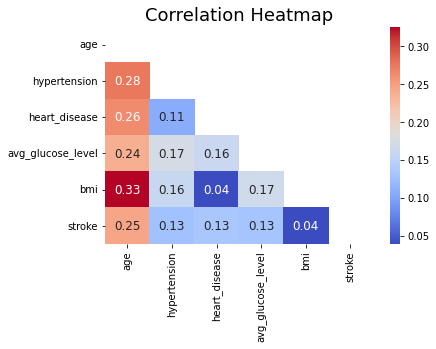

In [18]:
corr = df.corr()

sns.heatmap(corr, 
            xticklabels=corr.columns, 
            yticklabels=corr.columns, 
            cmap='coolwarm',
            annot=True,
            annot_kws={'size': 12},
            fmt=".2f",
            cbar=True,
            mask= np.triu(np.ones_like(corr, dtype=np.bool_))
           )
plt.title("Correlation Heatmap", fontsize=18)
plt.show()

### the correlation between the Tag (stroke) and bmi is too weak, better we drop it

In [19]:
df.drop("bmi",axis=1,inplace=True)


In [20]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1


### **Remove outliers:**

In [21]:

plt.rcParams["figure.figsize"]=(10, 10)

<Figure size 1440x720 with 0 Axes>

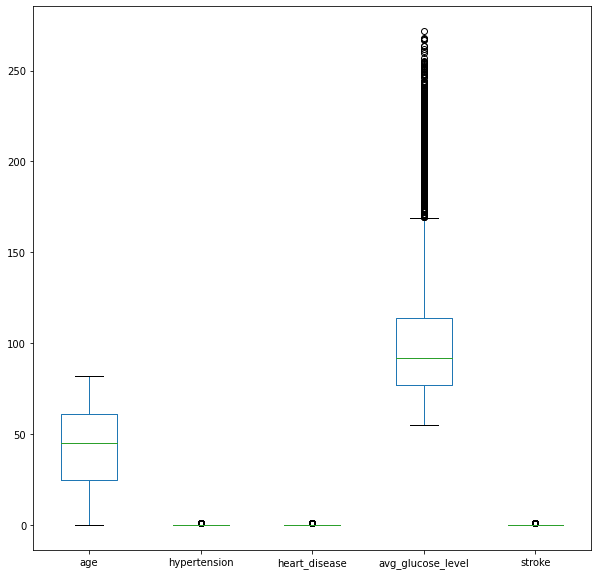

In [22]:
plt.figure(figsize= (20,10))
df.plot(kind = "box")
plt.show()

### Explore the shape of glucose data 

In [23]:
df['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

### Is not posssible to drop the outliers, so those are too many and we can affect the predictions

In [24]:
df[df["avg_glucose_level"]>114.090000].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1277 entries, 0 to 5108
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             1277 non-null   object 
 1   age                1277 non-null   float64
 2   hypertension       1277 non-null   int64  
 3   heart_disease      1277 non-null   int64  
 4   ever_married       1277 non-null   object 
 5   work_type          1277 non-null   object 
 6   Residence_type     1277 non-null   object 
 7   avg_glucose_level  1277 non-null   float64
 8   smoking_status     1277 non-null   object 
 9   stroke             1277 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 109.7+ KB


In [25]:
df["avg_glucose_level"].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

## **Features definition:**
### 1) **gender:** "Male", "Female" or "Other"
### 2) **age:** age of the patient
### 3) **hypertension:** 0 No, 1 Yes (If the patient has previous hypertention diagnosis of)
### 4) **heart_disease:** 0 = No, 1 = Yes (If the patient has previous heart attacks)
### 5) **ever_married:** "No" or "Yes"
### 6) **work_type:** "Govt_jov", "Never_worked", "Private" or "Self-employed" (If patient works for a prived institution, government, is independient employee or unemployed)
### 7) **Residence_type:** "Rural" or "Urban"
### 8) **avg_glucose_level:** average glucose level in blood (If the patient has previous diabetes diagnosis or high lebels of sugar in blood)
### 9) **smoking_status:** "formerly smoked", "never smoked", "smokes" or "Unknown"*


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   smoking_status     5110 non-null   object 
 9   stroke             5110 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 399.3+ KB


### **Numerical features analysis:** age, hypertension, heart_disease, avg_glucose_level, are numerical, we can analyze those

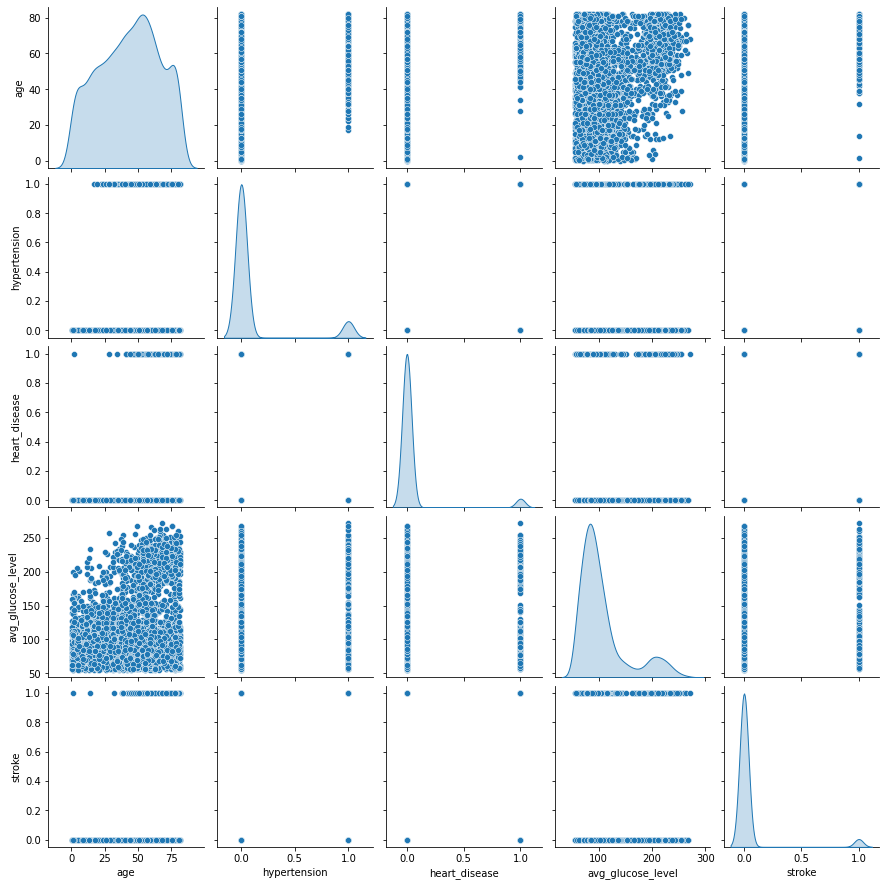

In [27]:
sns.pairplot(df, kind='scatter', diag_kind='kde', markers=["o", "s", "D"])

In [28]:
df_float = df[["age", "hypertension", "heart_disease", "avg_glucose_level", "stroke"]]
df_float.head()

,age,hypertension,heart_disease,avg_glucose_level,stroke
0,67.0,0,1,228.69,1
1,61.0,0,0,202.21,1
2,80.0,0,1,105.92,1
3,49.0,0,0,171.23,1
4,79.0,1,0,174.12,1


### In General variables are bell shaped. Stroke is imbalanced as well as glucose, hypertension and hearth disease. 

### **Categorical features analysis:**

In [29]:
df_categorical = df[["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]]

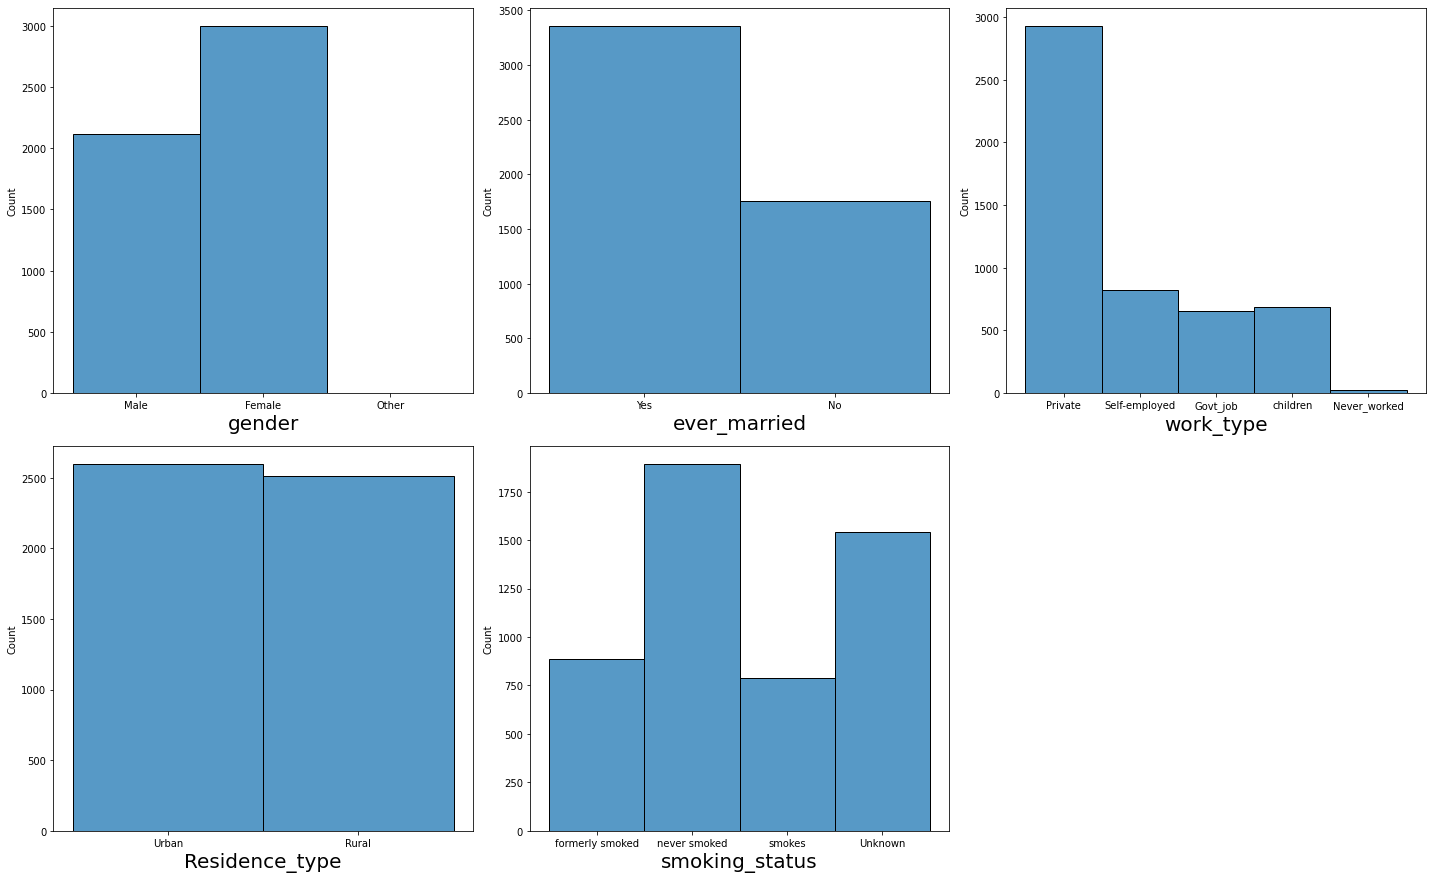

In [30]:
plt.figure(figsize = (20,30), facecolor = "white")
plotnumber = 1
for column in df_categorical:
  if plotnumber <= 15:
    ax = plt.subplot(5,3,plotnumber)
    sns.histplot(df_categorical[column])
    plt.xlabel(column, fontsize=20)
  plotnumber += 1
plt.tight_layout()

### The data in categorical values is almost well disributed, work type has a bias to the right, which is correct.

## **Label Encoding:** Remove all tags and replace them for categorical numbers to make it easy for normalization

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   smoking_status     5110 non-null   object 
 9   stroke             5110 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 399.3+ KB


### All dtype as object should be encoded as numbers

In [32]:
enc = LabelEncoder()

### encoding categorical values

In [33]:
gender = enc.fit_transform(df["gender"])
ever_married = enc.fit_transform(df["ever_married"])
work_type = enc.fit_transform(df["work_type"])
Residence_type = enc.fit_transform(df["Residence_type"])
smoking_status = enc.fit_transform(df["smoking_status"])

### Replacing encoding in data frame

In [34]:
df["gender"]= gender
df["ever_married"]= ever_married
df["work_type"]= work_type
df["Residence_type"]= Residence_type
df["smoking_status"]= smoking_status

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   smoking_status     5110 non-null   int64  
 9   stroke             5110 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 399.3 KB


### Now all are numbers

In [36]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,1,1
1,0,61.0,0,0,1,3,0,202.21,2,1
2,1,80.0,0,1,1,2,0,105.92,2,1
3,0,49.0,0,0,1,2,1,171.23,3,1
4,0,79.0,1,0,1,3,0,174.12,2,1
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,2,0
5106,0,81.0,0,0,1,3,1,125.20,2,0
5107,0,35.0,0,0,1,3,0,82.99,2,0
5108,1,51.0,0,0,1,2,0,166.29,1,0


## **Normalize data:** Make data bell shaped, expresed in std dev of each own mean, and independient of units, easy to work with.

In [37]:
std = StandardScaler()

In [38]:
df_std = std.fit_transform(df)

In [39]:
df_std

array([[ 1.18807255,  1.05143428, -0.32860186, ...,  2.70637544,
        -0.35178071,  4.41838074],
       [-0.840344  ,  0.78607007, -0.32860186, ...,  2.12155854,
         0.58155233,  4.41838074],
       [ 1.18807255,  1.62639008, -0.32860186, ..., -0.0050283 ,
         0.58155233,  4.41838074],
       ...,
       [-0.840344  , -0.36384151, -0.32860186, ..., -0.51144264,
         0.58155233, -0.22632726],
       [ 1.18807255,  0.34379639, -0.32860186, ...,  1.32825706,
        -0.35178071, -0.22632726],
       [-0.840344  ,  0.03420481, -0.32860186, ..., -0.46086746,
        -1.28511375, -0.22632726]])

## **Discusion**
The data is ready for the next step, modelling. 
Throughout the EDA 2 variables were dropped, one identified each data, and the other was poorly correlated with the target. In the following steps likely, we will use logistic regression with 9 statistical features for one target. 
the most essential features, like glucose, hypertension and heart disease, are imbalanced, as well as the target. We likely will use data augmenting to fill data and make the model more accurate.  (78 words)



# Assignment 2 Final   (Deliverable starts here)

### Support Vector Machine:
#### •	Develop a support vector machine (SVM) using the sci-kit learn module.
#### •	If you have a multiclass classification problem, you will need to use either the one vs. one or one vs. rest method involving multiple SVMs. Try both and explain what these options mean.




In [57]:
# Bin the 'stroke' column into two categories: 0 (no stroke) and 1 (has stroke)
df['stroke'] = pd.cut(df['stroke'], bins=[-1, 0, 1], labels=[0, 1])

# Separate the features and labels
X = df.drop('stroke', axis=1)  # X = Feaures
y = df['stroke'] 

In [58]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training set into training and validation sets
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
              # y = Labels

In [134]:
print('X_train, Trainin Data Set shape: ', X_train.shape)
print('X_val, Validation data set shape : ', X_val.shape)
print('X_test, Testing data set shape : ', X_test.shape)

X_train, Trainin Data Set shape:  (4088, 9)
X_val, Validation data set shape :  (511, 9)
X_test, Testing data set shape :  (511, 9)


In [43]:
# Instantiate the SVM classifier with chosen hyperparameters
svm = SVC(kernel='rbf', C=1, gamma='scale')

# Train the SVM classifier on the training data
svm.fit(X_train, y_train)

# Make predictions on the validation data set
y_pred = svm.predict(X_val)

# Evaluate the performance of the SVM using accuracy, precision, and recall scores
print('Accuracy: ', round(accuracy_score(y_test, y_pred)*100, 2), ' %')

Accuracy:  93.93  %


In [44]:
# print classification report and compare with previous results in validation set
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97       480
           1       0.00      0.00      0.00        31

    accuracy                           0.94       511
   macro avg       0.47      0.50      0.48       511
weighted avg       0.88      0.94      0.91       511



/home/ubuntu/venv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/venv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/venv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### •	Experiment with at least three different values of the C parameter. Explain what this parameter controls. 

The C parameter in SVM is a regularization parameter that controls the trade-off between achieving a low training error and a low testing error. It determines the degree of misclassification errors that the model is willing to tolerate during the training process.

When C is small, the SVM model will allow more misclassifications in the training set, which can lead to a larger margin and more generalizable models with less overfitting. A small value of C also leads to a more stable solution and can be useful when dealing with noisy or overlapping data. However, setting C too small can result in a model that underfits the training data and has poor performance on the testing data.

On the other hand, when C is large, the SVM model will aim to correctly classify as many training examples as possible, which can lead to a smaller margin and more complex models with higher overfitting. A large value of C can be useful when dealing with linearly separable data or when there is a high degree of noise in the data. However, setting C too large can result in a model that overfits the training data and has poor generalization performance.

#### •	Try the linear, rbf (with different choices of gamma) and polynomial kernels. Comment on which of these works best for your data and why.
#### •	For each model:
#### i.	Find predictions using the validation set.
#### ii.	Use the score() function to display the training/validation accuracy (for classification) or coefficient of determination (for regression).


I trained three sets of parameters to build several models for my task. First, I created 96 models by selecting 7 values for C, 7 values for gamma, and 2 values for class_weight. For each model, I evaluated the mean accuracy and the accuracy for training, validation, and testing datasets.

Next, I created a new grid using 2 values for C, 2 values for gamma, 3 values for kernel, and 2 degrees. Then, I manually created another grid using loops with 7 values for C, 7 values for gamma, and 2 values for class_weight.

Despite their similarities in results, all models showed a high accuracy in predicting true negatives but a low accuracy in predicting true positives.

I am not satisfied with the results


In [45]:
# create a dictionary of SVM parameters to try
param_grid = {
            'C': [0.1, 1, 10, 100, 1000, 10000, 100000],
            'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
            'class_weight': ['balanced', 'None']
                }
 
# use a grid search to find the parameters for best results
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, n_jobs=-1)

# fit the data again using the grid model
grid.fit(X_train, y_train)

# show which parameters gave the best results
grid.best_params_


Fitting 5 folds for each of 98 candidates, totalling 490 fits


/home/ubuntu/venv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.70035612 0.7199271  0.75588488 0.87231448 0.95425658 0.95425658
 0.95425658        nan        nan        nan        nan        nan
        nan        nan 0.7211481  0.736316   0.77055451 0.91193974
 0.95401208 0.95425658 0.95425658        nan        nan        nan
        nan        nan        nan        nan 0.72115049 0.75563709
 0.83879899 0.93028732 0.95425658 0.95425658 0.95425658        nan
        nan        nan        nan        nan        nan        nan
 0.7201719  0.77251558 0.89090417 0.92857523 0.95425658 0.95425658
 0.95425658        nan        nan        nan        nan        nan
        nan        nan 0.73191293 0.81140555 0.90704797 0.92857523
 0.95425658 0.95425658 0.95425658        nan        nan        nan
        nan        nan        nan        nan 0.73973749 0.83537601
 0.91022825 0.92857523 0.95425658 0.95425658 0.954

{'C': 0.1, 'class_weight': 'balanced', 'gamma': 1}

In [48]:
# generate predictions using the validation data and grid model
grid_pred_val = grid.predict(X_val)
# print classification report and compare with previous results
print(classification_report(y_val, grid_pred_val))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       480
           1       0.00      0.00      0.00        31

    accuracy                           0.94       511
   macro avg       0.47      0.50      0.48       511
weighted avg       0.88      0.94      0.91       511



In [50]:
# Evaluate the performance of the SVM using accuracy, precision, and recall scores
print('Accuracy Best Model: ', round(accuracy_score(y_val, grid_pred_val)*100, 2), ' %')

Accuracy Best Model:  93.74  %


In [51]:
param_grid = {"C": [0.1, 1],
              "gamma": [0.001, 0.0001],
              "kernel": ["linear", "rbf", "poly"],
              "degree": [2, 3] # Only used for poly kernel
             }
			  
# use a grid search to find the parameters for best results
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, n_jobs=-1)

# fit the data again using the grid model
grid.fit(X_train, y_train)

# show which parameters gave the best results
grid.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'C': 0.1, 'degree': 2, 'gamma': 0.001, 'kernel': 'linear'}

In [52]:
# generate predictions using the validation data and grid model
grid_pred_val = grid.predict(X_val)
# print classification report and compare with previous results
print(classification_report(y_val, grid_pred_val))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       480
           1       0.00      0.00      0.00        31

    accuracy                           0.94       511
   macro avg       0.47      0.50      0.48       511
weighted avg       0.88      0.94      0.91       511



/home/ubuntu/venv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/venv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/venv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
# Evaluate the performance of the SVM using accuracy, precision, and recall scores
print('Accuracy Best Model: ', round(accuracy_score(y_val, grid_pred_val)*100, 2), ' %')

Accuracy Best Model:  93.93  %


In [63]:
def compute_accuracy(X_train, y_train, X_val, y_val, X_test, y_test, clf, param_grid):
    results = []
    for C in param_grid['C']:
        for gamma in param_grid['gamma']:
            for class_weight in param_grid['class_weight']:
                clf.set_params(C=C, gamma=gamma, class_weight=class_weight)
                clf.fit(X_train, y_train)
                y_val_pred = clf.predict(X_val)
                train_accuracy = clf.score(X_train, y_train)
                val_accuracy = clf.score(X_val, y_val)
                test_accuracy = clf.score(X_test, y_test)
                tn, fp, fn, tp = confusion_matrix(y_val, y_val_pred).ravel()
                results.append({'C': C,
                                'gamma': gamma,
                                'class_weight': class_weight,
                                'train_accuracy %': round(train_accuracy*100, 2),
                                'val_accuracy %': round(val_accuracy*100, 2),
                                'test_accuracy %': round(test_accuracy*100, 2),
                                'tn': tn,
                                'fp': fp,
                                'fn': fn,
                                'tp': tp,
                                'precision': tp / (tp + fp),
                                'recall': tp / (tp + fn),
                                'f1_score': 2 * ((tp / (tp + fp)) * (tp / (tp + fn))) / ((tp / (tp + fp)) + (tp / (tp + fn))),
                                'specificity': tn / (tn + fp)
                               })
    return pd.DataFrame(results)



In [66]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100, 1000, 10000, 100000],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'class_weight': ['balanced', None]
}

In [67]:

# Create the SVM classifier object
svm = SVC()

# Compute accuracy for each combination of hyperparameters
results = compute_accuracy(X_train, y_train, X_val, y_val, X_test, y_test, svm, param_grid)

/home/ubuntu/venv/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars
/home/ubuntu/venv/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in long_scalars
/home/ubuntu/venv/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars
/home/ubuntu/venv/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in long_scalars
/home/ubuntu/venv/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars
/home/ubuntu/venv/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in long_scalars
/home/ubuntu/venv/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars
/home/ubuntu/venv/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: in

In [68]:
# Create a dataframe to store the results
df_results = pd.DataFrame(columns=['C', 'gamma', 'class_weight', 'train Acc %', 'val Acc %', 'Test Acc %', 'tn', 'fp', 'fn', 'tp', 'precision', 'recall', 'f1_score', 'specificity'])

# Add the results to the dataframe
for _, row in results.iterrows():
    df_results = df_results.append({'C': row['C'],
                                    'gamma': row['gamma'],
                                    'class_weight': row['class_weight'],
                                    'train Acc %': row['train_accuracy %'],
                                    'val Acc %': row['val_accuracy %'],
                                    'Test Acc %': row['test_accuracy %'],
                                    'tn': row['tn'],
                                    'fp': row['fp'],
                                    'fn': row['fn'],
                                    'tp': row['tp'],
                                    'precision': row['precision'],
                                    'recall': row['recall'], 
                                    'f1_score': row['f1_score'],
                                    'specificity': row['specificity']
                                   }, ignore_index=True)

df_results = df_results.sort_values(by=['val Acc %', 'precision'], ascending=False)

    # Print the dataframe
df_results

,C,gamma,class_weight,train Acc %,val Acc %,Test Acc %,tn,fp,fn,tp,precision,recall,f1_score,specificity
73,10000.0,0.0010,NaN,96.11,93.93,92.95,479,1,30,1,0.500000,0.032258,0.060606,0.997917
1,0.1,0.0001,NaN,95.43,93.93,93.93,480,0,31,0,NaN,0.000000,NaN,1.000000
3,0.1,0.0010,NaN,95.43,93.93,93.93,480,0,31,0,NaN,0.000000,NaN,1.000000
5,0.1,0.0100,NaN,95.43,93.93,93.93,480,0,31,0,NaN,0.000000,NaN,1.000000
7,0.1,0.1000,NaN,95.43,93.93,93.93,480,0,31,0,NaN,0.000000,NaN,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,0.1,0.0010,balanced,71.97,76.32,68.88,363,117,4,27,0.187500,0.870968,0.308571,0.756250
42,100.0,0.0001,balanced,71.89,75.93,70.06,361,119,4,27,0.184932,0.870968,0.305085,0.752083
0,0.1,0.0001,balanced,70.28,74.95,68.69,358,122,6,25,0.170068,0.806452,0.280899,0.745833
56,1000.0,0.0001,balanced,73.26,74.95,73.19,358,122,6,25,0.170068,0.806452,0.280899,0.745833


In [69]:
# Create a table to display the results
table = PrettyTable(['C', 'gamma', 'class_weight', 'train Acc %', 'val Acc %', 'Test Acc %', 'tn', 'fp', 'fn', 'tp', 'precision', 'recall'])

# Add the results to the table
for _, row in results.iterrows():
    table.add_row([row['C'], row['gamma'], row['class_weight'], row['train_accuracy %'], row['val_accuracy %'], row['test_accuracy %'], row['tn'], row['fp'], row['fn'], row['tp'], row['precision'], row['recall']])

# Print the table
print(table)

+----------+--------+--------------+-------------+-----------+------------+-----+-----+----+----+---------------------+---------------------+
|    C     | gamma  | class_weight | train Acc % | val Acc % | Test Acc % |  tn |  fp | fn | tp |      precision      |        recall       |
+----------+--------+--------------+-------------+-----------+------------+-----+-----+----+----+---------------------+---------------------+
|   0.1    | 0.0001 |   balanced   |    70.28    |   74.95   |   68.69    | 358 | 122 | 6  | 25 | 0.17006802721088435 |  0.8064516129032258 |
|   0.1    | 0.0001 |     None     |    95.43    |   93.93   |   93.93    | 480 |  0  | 31 | 0  |         nan         |         0.0         |
|   0.1    | 0.001  |   balanced   |    71.97    |   76.32   |   68.88    | 363 | 117 | 4  | 27 |        0.1875       |  0.8709677419354839 |
|   0.1    | 0.001  |     None     |    95.43    |   93.93   |   93.93    | 480 |  0  | 31 | 0  |         nan         |         0.0         |
|   0.

In [72]:
print('Best model:')
df_results[0:1]

Best model:


,C,gamma,class_weight,train Acc %,val Acc %,Test Acc %,tn,fp,fn,tp,precision,recall,f1_score,specificity
73,10000.0,0.001,NaN,96.11,93.93,92.95,479,1,30,1,0.5,0.032258,0.060606,0.997917


In [123]:
# Instantiate the SVM classifier with chosen hyperparameters
svm_best_model = SVC(C=10000, gamma=0.001, class_weight = None)

# Train the SVM classifier on the training data
svm_best_model.fit(X_val, y_val)

# Make predictions on the validation data set
y_pred_val = svm.predict(X_val)

# Evaluate the performance of the SVM using accuracy, precision, and recall scores
print('Accuracy: ', round(accuracy_score(y_val, y_pred_val)*100, 2), ' %')

Accuracy:  93.93  %


In [124]:
# print classification report and compare with previous results
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       480
           1       0.50      0.03      0.06        31

    accuracy                           0.94       511
   macro avg       0.72      0.52      0.51       511
weighted avg       0.91      0.94      0.91       511



#### iii.	Decide which metrics to use in analysis (e.g. absolute error, RMSE, MSE, recall, precision, Fβ score, etc.); calculate them using the validation set and display them. Explain how these metrics will help you decide which model is best.


I've included values for Recall, Precision, F-beta score, Sensitivity, and Specificity in the table. The critical error is a False Negative because we don't want a sick person to be predicted as healthy, as it could lead to their death. Therefore, besides accuracy, we should consider Recall and Precision as important metrics. To compare different models and decide which one is the best, it's a good idea to calculate these metrics on the validation set and compare them.

#### iv.	If you have a binary classification model, display the confusion matrix, ROC curve and AUC for the validation set.
#### •	Compare models and justify a final choice of hyperparameters based on the above quantitative analysis and the use case. Comment on overfitting, underfitting and any qualitative reasoning.

the best model is: 

In [104]:
print('The best model is the next:')
df_results[0:1]

The best model is the next:


,C,gamma,class_weight,train Acc %,val Acc %,Test Acc %,tn,fp,fn,tp,precision,recall,f1_score,specificity
73,10000.0,0.001,NaN,96.11,93.93,92.95,479,1,30,1,0.5,0.032258,0.060606,0.997917


In [125]:
# print classification report and acurracy for best model
print('Accuracy: ', round(accuracy_score(y_val, y_pred_val)*100, 2), ' %')
print(classification_report(y_val, y_pred_val))

Accuracy:  93.93  %
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       480
           1       0.50      0.03      0.06        31

    accuracy                           0.94       511
   macro avg       0.72      0.52      0.51       511
weighted avg       0.91      0.94      0.91       511



In [126]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix for validation set
cm = confusion_matrix(y_val, y_pred_val)

# Print the confusion matrix
print(cm)


[[479   1]
 [ 30   1]]


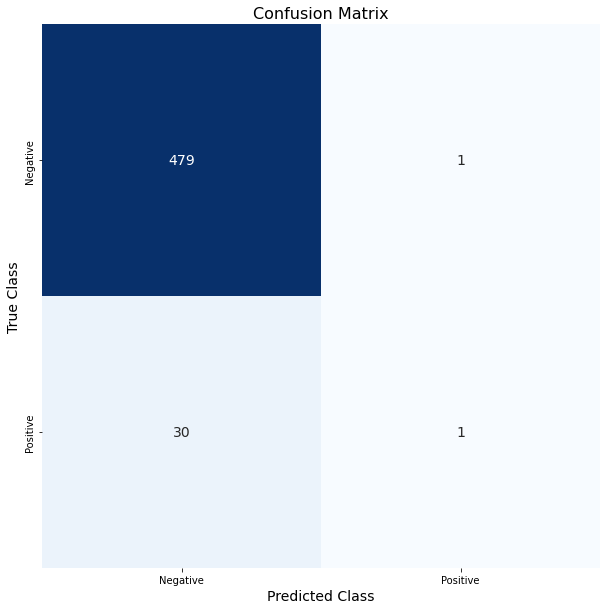

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define class labels and colormap
class_labels = ['Negative', 'Positive']
cmap = sns.color_palette("Blues", as_cmap=True)

# Plot the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, cmap=cmap, fmt='g', 
            xticklabels=class_labels, yticklabels=class_labels,
            cbar=False, annot_kws={"fontsize": 14})
plt.xlabel('Predicted Class', fontsize=14)
plt.ylabel('True Class', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()


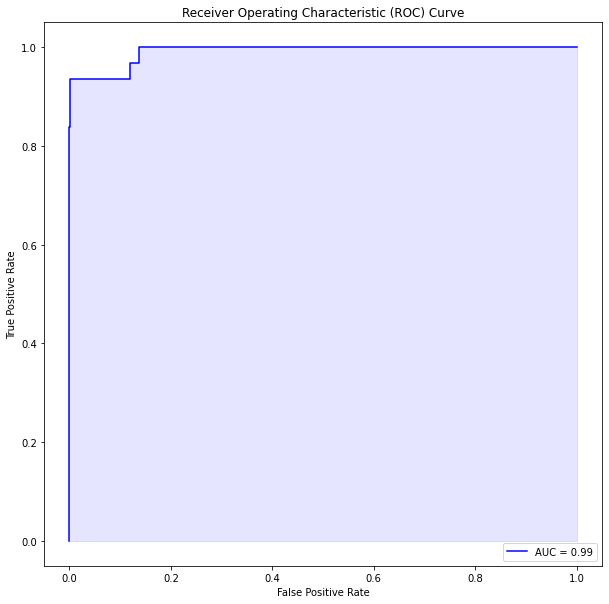

In [128]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have predicted scores for the positive class
y_scores = svm_best_model.decision_function(X_val)

# Compute the false positive rate, true positive rate, and threshold
fpr, tpr, thresholds = roc_curve(y_val, y_scores)

# Compute the area under the ROC curve
roc_auc = roc_auc_score(y_val, y_scores)

# Plot the ROC curve and shade the area under the curve
plt.plot(fpr, tpr, color='b', label='AUC = {:.2f}'.format(roc_auc))
plt.fill_between(fpr, tpr, color='b', alpha=0.1)

# Add labels and a legend to the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()


After thoroughly evaluating various grids of hyperparameters, it became apparent that all models were overfitted, as they consistently showed higher accuracy on the training data compared to the validation set. Despite experimenting with different hyperparameters, the results remained largely unchanged. Eventually, I selected the model with manual parameters, as it demonstrated higher precision. However, it's important to note that all models displayed low values in true positives, which is a critical parameter for the study case. Additionally, the ROC and AUC curves did not conform to the expected rounded shape. Despite the imbalanced nature of some features and the target tag, the quantitative analysis was performed exceptionally well. However, this imbalance negatively impacted the model's precision.


In [133]:

import joblib

# Save the trained model
joblib.dump(svm_best_model, 'svm_best_model.joblib')

['svm_best_model.joblib']

In [136]:
# Save the trained model
joblib.dump(X_test, 'X_test.joblib')

['X_test.joblib']

In [135]:
# Save the trained model
joblib.dump(y_test, 'y_test.joblib')

['y_test.joblib']